**<h1>Credit Card Customer : Data analysis</h1>**
---

<h2>The purpose of progressing </h2>  

The data analysis we carried out is for Data Science Term Project  

We are going to analyze the data through End-to-End process that we learned in Data Science.  

<b>End-to-End Process:<b>
1. Objective
2. Data Curation
3. Data Inspection
4. Data Preprocessing
5. Data Analysis
6. Evaluation
7. Deployment

***


# 1. Objective Setting & 2. Data Curation

**<h2>Background  of the Dataset</h2>**

The dataset from a website with the URL as https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers
This dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

Banks should be careful that customers leave their credit card services.
Banks have a lot of information about their customers.
The bank wants to prevent customers from leaving by the customer's information they have.
They want to predict whether a particular customer will leave. 

**<h2>Our goal: Predicting the likelihood of a new card customer leaving</h2>**  



**Description of the Dataset** <br>
Columns description: <br>
CLIENTNUM: Client number. Unique identifier for the customer holding the account <br>
Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0 <br>
Customer_Age: Demographic variable - Customer's Age in Years <br>
Gender: Demographic variable - M=Male, F=Female <br>
Dependent_count: Demographic variable - Number of dependents <br>
Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.) <br>
Marital_Status: Demographic variable - Married, Single, Divorced, Unknown <br>
Income_Category: Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown) <br>
Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum) <br>
Months_on_book: Period of relationship with bank <br>
Total_Relationship_Count: Total no. of products held by the customer <br>
Months_Inactive_12_mon: No. of months inactive in the last 12 months <br>
Contacts_Count_12_mon: No. of Contacts in the last 12 months <br>
Credit_Limit: Credit Limit on the Credit Card <br>
Total_Revolving_Bal: Total Revolving Balance on the Credit Card <br>
Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months) <br>
Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1) <br>
Total_Trans_Amt: Total Transaction Amount (Last 12 months) <br>
Total_Trans_Ct: Total Transaction Count (Last 12 months) <br>
Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1) <br>
Avg_Utilization_Ratio: Average Card Utilization Ratio <br>

 
The target feature is Attrition_Flag

# 3. Data Inspection

In [341]:
# Importing necessery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

      Attrition_Flag Gender Education_Level Marital_Status Income_Category  \
0  Existing Customer      M     High School        Married     $60K - $80K   
1  Existing Customer      F        Graduate         Single  Less than $40K   
2  Existing Customer      M        Graduate        Married    $80K - $120K   
3  Existing Customer      F     High School        Unknown  Less than $40K   
4  Existing Customer      M      Uneducated        Married     $60K - $80K   

  Card_Category  
0          Blue  
1          Blue  
2          Blue  
3          Blue  
4          Blue  


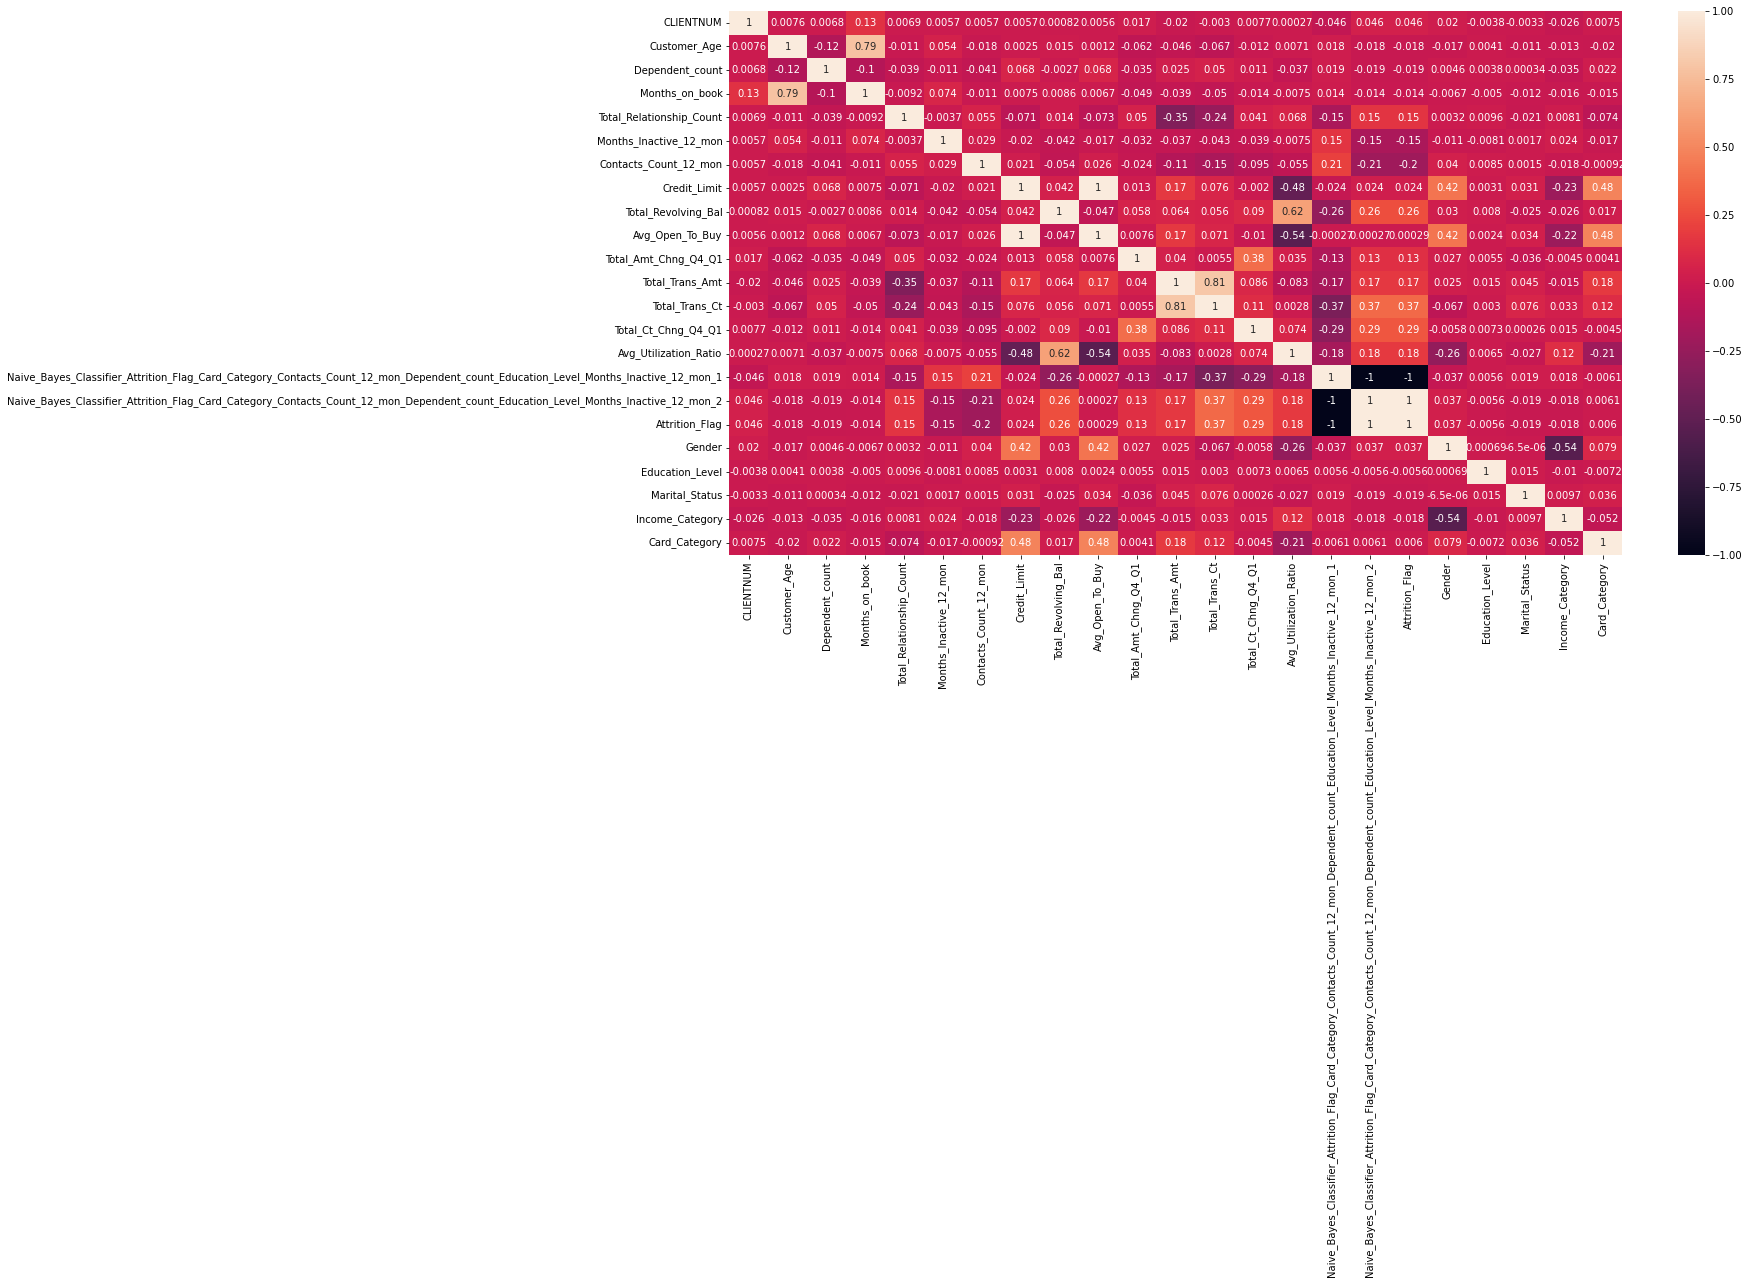

In [342]:
data = pd.read_csv('data/BankChurners.csv')
categorical_features = data.select_dtypes(include=['object'])
categorical_features = categorical_features.copy()
print(categorical_features.head())
numerical_features = data.select_dtypes(exclude=['object'])
numerical_features = numerical_features.copy()
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
col_to_encode = categorical_features.columns

for i in range(len(categorical_features.columns)):
        categorical_features[col_to_encode[i]] = label.fit_transform(categorical_features[col_to_encode[i]])
a=pd.concat([numerical_features, categorical_features], axis=1)
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(a.corr(), annot=True)
plt.show()

The features with low correlation with the target value was deleted

In [343]:
# loading the dataset
df = pd.read_csv('data/BankChurners.csv')
df = df[df.columns[:-2]]
df.drop(columns=['CLIENTNUM'], inplace=True)
df.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [344]:
# Inspect datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [345]:
# Statistical Analysis of Data
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [346]:
# Check count of missing values
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

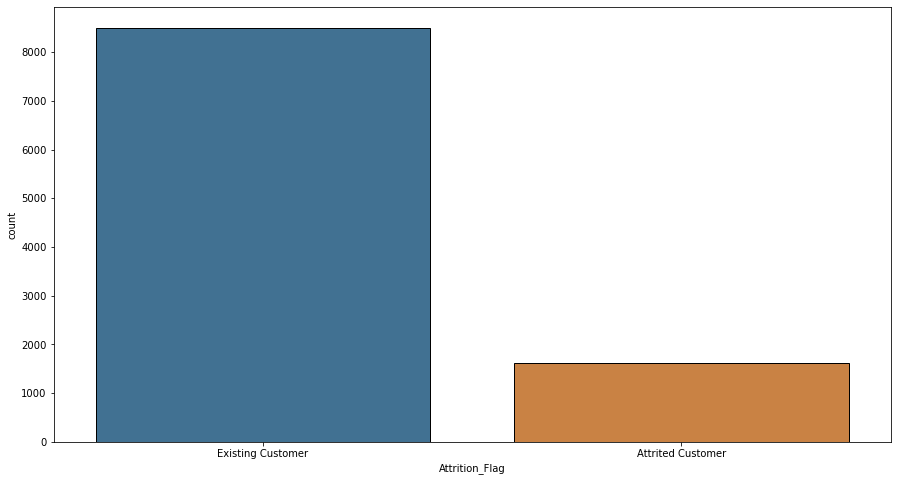

In [347]:
# Visualize the categorical data #1: Attrition_Flag
plt.figure(figsize = (15,8))
sns.countplot(x = df['Attrition_Flag'], edgecolor = 'black', saturation = 0.55)
plt.show()

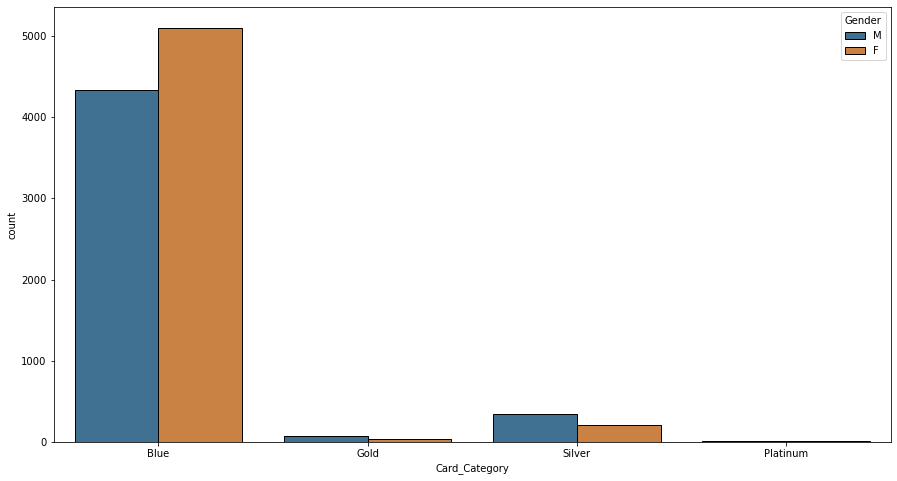

In [348]:
# Visualize the categorical data #2: Card_Category
plt.figure(figsize = (15, 8))
sns.countplot(x = df['Card_Category'], hue = df['Gender'], edgecolor = 'black', saturation = 0.55)
plt.show()

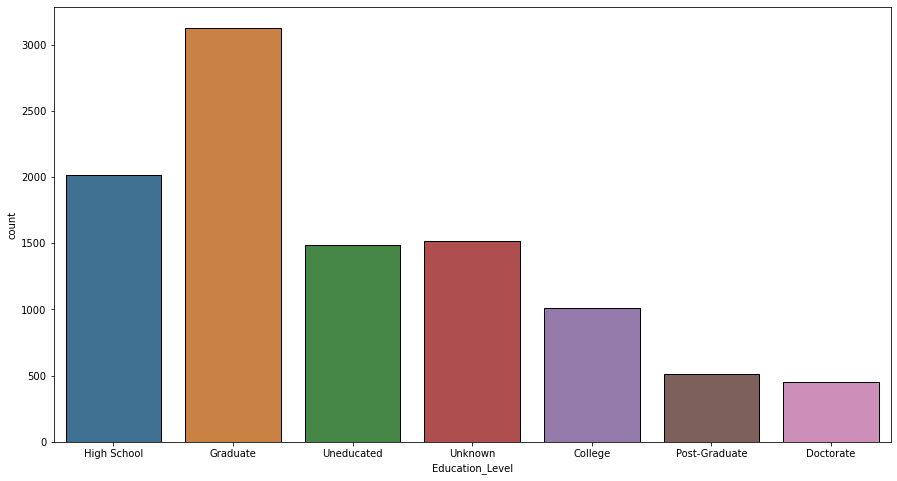

In [349]:
# Visualize the categorical data #3: Education_Level
plt.figure(figsize = (15,8))
sns.countplot(x= df['Education_Level'], edgecolor = 'black', saturation = 0.55)
plt.show()

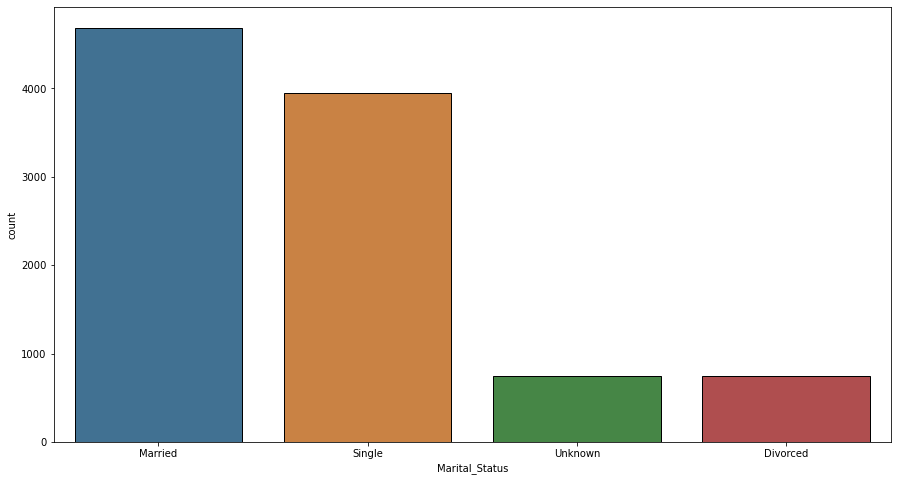

In [350]:
# Visualize the categorical data #4: Marital_Status
plt.figure(figsize = (15,8))
sns.countplot(x = df['Marital_Status'], edgecolor = 'black', saturation = 0.55)
plt.show()

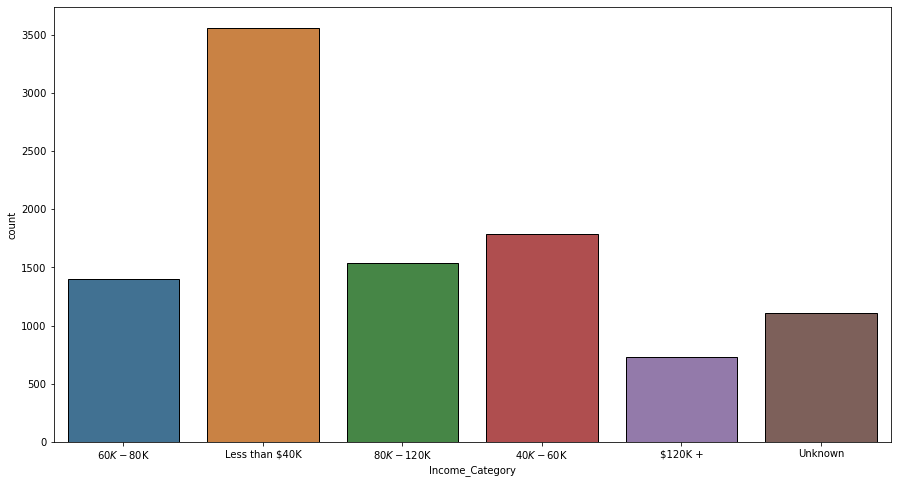

In [351]:
# Visualize the categorical data #5: Income_Category
plt.figure(figsize = (15,8))
sns.countplot(x = df['Income_Category'], edgecolor = 'black', saturation = 0.55)
plt.show()

In [352]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

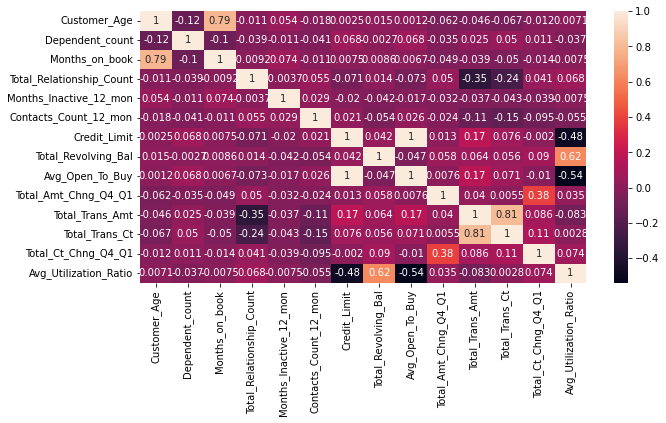

In [353]:
# Visualize numerical data : Months_on_book, Customer_age, Avg_Utilization_Ratio and Total_Revolving_Bal

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(X.corr(), annot=True)
plt.show()

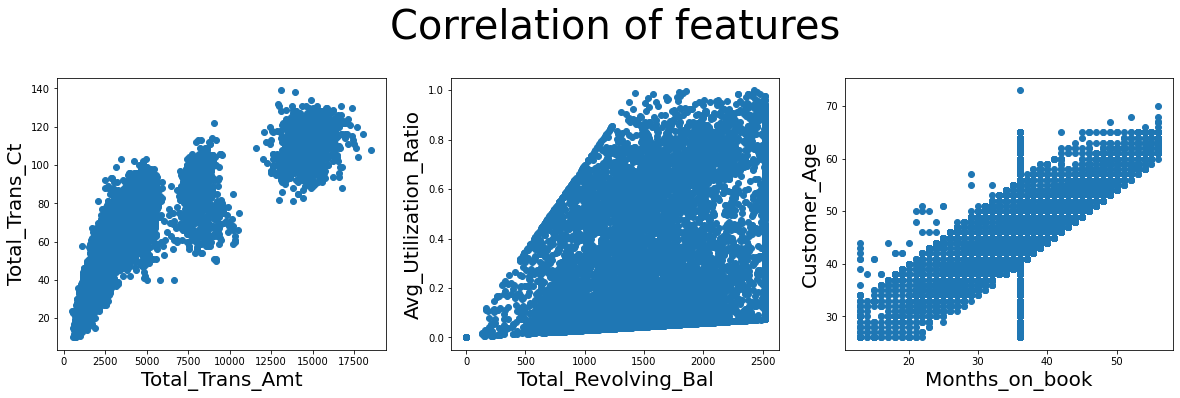

In [354]:
# scattergraph on the six most correlatable features: 'Total_Trans_Amt' and 'Total_Trans_Ct', 'Total_Revolving_Bal' and 'Avg_Utilization_Ratio', 'Months_on_book' and 'Customer_Age'.

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

ax1.scatter(X['Total_Trans_Amt'], df['Total_Trans_Ct'])
ax2.scatter(X['Total_Revolving_Bal'], df['Avg_Utilization_Ratio'])
ax3.scatter(X['Months_on_book'], df['Customer_Age'])

ax1.set_xlabel('Total_Trans_Amt', fontsize=20)
ax1.set_ylabel('Total_Trans_Ct', fontsize=20)

ax2.set_xlabel('Total_Revolving_Bal', fontsize=20)
ax2.set_ylabel('Avg_Utilization_Ratio', fontsize=20)

ax3.set_xlabel('Months_on_book', fontsize=20)
ax3.set_ylabel('Customer_Age', fontsize=20)

ax2.set_title('Correlation of features', fontsize=40, pad=40)

plt.show()

# 4. Data Preprocessing

There is 'Unknown' values which are same as missing values
Giving Nan values to Unknown in categorical variables is a great technique to deal with missing values in categorical variables

In [355]:
# Replace 'Unknown' values to NaN
df = df.replace('Unknown', np.nan)

In [356]:
# Check count of missing values
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

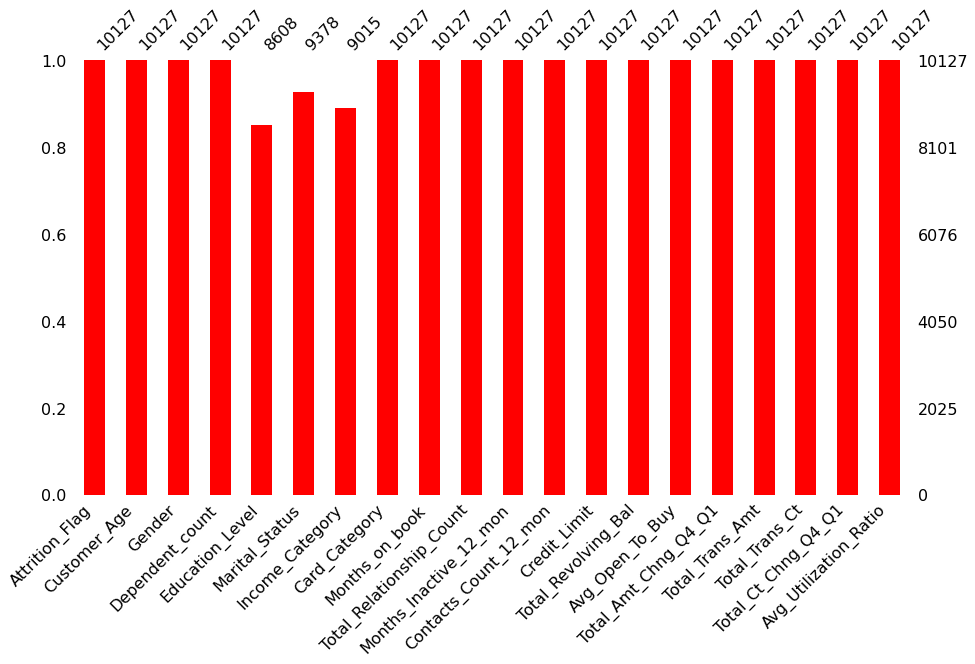

In [357]:
# Visualizing missing value
missingno.bar(df, color = 'red', figsize = (15,8))
plt.show()

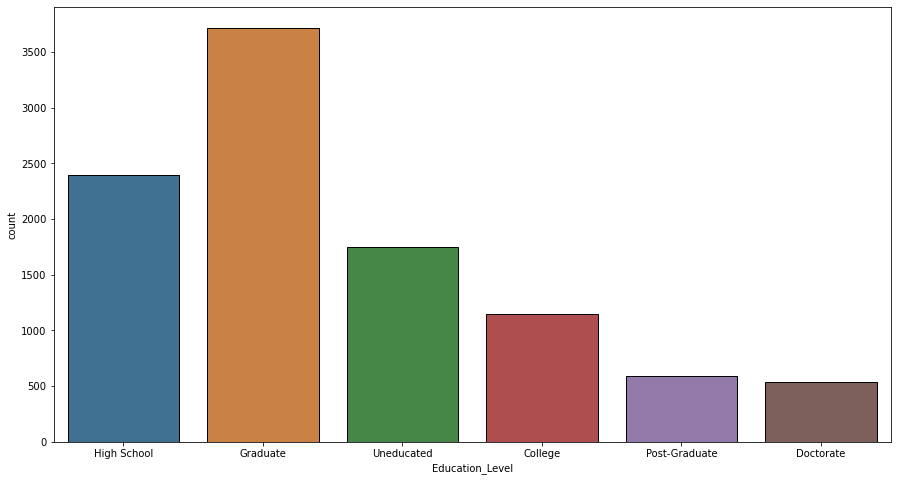

In [358]:
# Fill NaN by using ffill
df.fillna(axis=0,method='ffill',inplace=True)

# Visualize the changed Education_Level again
plt.figure(figsize = (15,8))
sns.countplot(x= df['Education_Level'], edgecolor = 'black', saturation = 0.55)
plt.show()

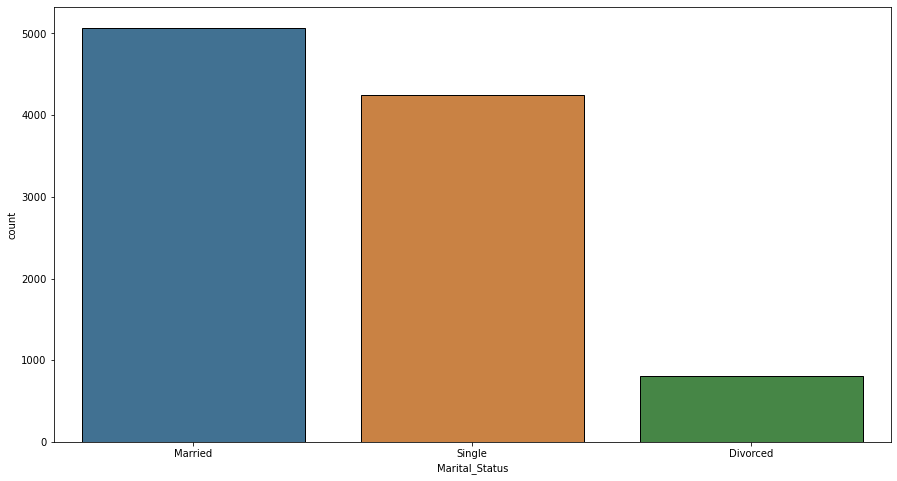

In [359]:
# Visualize the changed Marital_Status again
plt.figure(figsize = (15,8))
sns.countplot(x = df['Marital_Status'], edgecolor = 'black', saturation = 0.55)
plt.show()

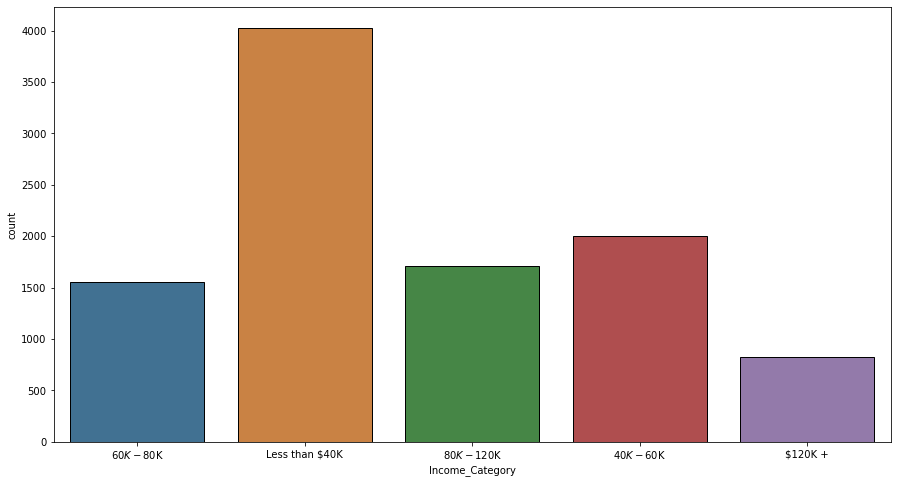

In [360]:
# Visualize the changed Income_Category
plt.figure(figsize = (15,8))
sns.countplot(x = df['Income_Category'], edgecolor = 'black', saturation = 0.55)
plt.show()

**<h3>Handling missing value is done</h3>**

**<h2> Under sampling</h2>**

In the "Attrition Flag" column of this dataset, the "existing" ratio is 85%. <br> Therefore, even if you always predict Existing, the probability of getting it right is 85%, so we will go through the undersampling process of matching the ratio of "existing" and "attritied" in the training dataset and the test dataset.

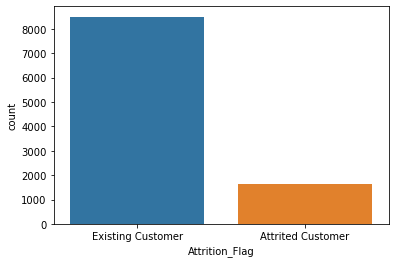

In [361]:
sns.countplot(x = df['Attrition_Flag'])
plt.show()

In [362]:
zero = df.loc[df.Attrition_Flag == 'Existing Customer']
one = df.loc[df.Attrition_Flag == 'Attrited Customer']

In [363]:
balanced_df = pd.concat([one, zero.sample(n=len(one))], axis=0)
df = balanced_df.sample(n=len(balanced_df)).reset_index(drop=True)

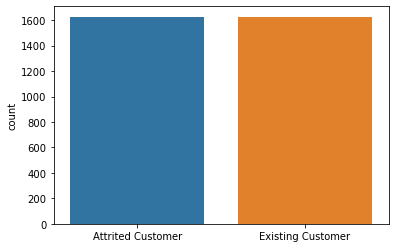

In [364]:
label = df['Attrition_Flag'].values
sns.countplot(x=label)
plt.show()

**<h2>Data Scaling & Encoding</h2>**

In [365]:
# importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [366]:
data = df

In [367]:
# Define function StandardScaler + Label encoding
def Standard_Label(numerical_features, categorical_features):
    # Numerical_features by StandardScaler

    # Independent variable(Target value)
    y = categorical_features.loc[:, ['Attrition_Flag']]

    # Dependent variables
    col_to_scale = numerical_features.columns
    numerical_features[col_to_scale] = StandardScaler().fit_transform(numerical_features[col_to_scale])

    # Categorical feature by Label encoding
    categorical_features = categorical_features.drop(['Attrition_Flag'], axis=1)
    label = LabelEncoder()
    col_to_encode = categorical_features.columns
    for i in range(len(categorical_features.columns)):
        categorical_features[col_to_encode[i]] = label.fit_transform(categorical_features[col_to_encode[i]])

    # pandas dataset X
    X = pd.concat([numerical_features, categorical_features], axis=1)

    Processed_st_label = pd.concat([X, y], axis=1)

    return X, y, Processed_st_label

In [368]:
# Define function StandardScaler + OneHot encoding
def Standard_OneHot(numerical_features, categorical_features):
    # Numerical_features by StandardScaler
    # Independent variable(Target value)
    y = categorical_features.loc[:, ['Attrition_Flag']]

    # Dependent variables
    col_to_scale = numerical_features.columns
    numerical_features[col_to_scale] = StandardScaler().fit_transform(numerical_features[col_to_scale])

    # Categorical feature by OneHot encoding
    categorical_features = categorical_features.drop(['Attrition_Flag'], axis=1)
    # Using pandas.get_dummies
    categorical_features = pd.get_dummies(categorical_features, columns=categorical_features.columns)

    # pandas dataset X
    X = pd.concat([numerical_features, categorical_features], axis=1)

    Processed_st_onehot = pd.concat([X, y], axis=1)

    return X, y, Processed_st_onehot

In [369]:
# Define function MinMaxScaler + Label encoding
def MinMax_Label(numerical_features, categorical_features):
    # Numerical_features by MinMaxScaler
    # Independent variable(Target value)
    y = categorical_features.loc[:, ['Attrition_Flag']]

    # Dependent variables
    col_to_scale = numerical_features.columns
    numerical_features[col_to_scale] = MinMaxScaler().fit_transform(numerical_features[col_to_scale])

    # Categorical feature by Label encoding
    categorical_features = categorical_features.drop(['Attrition_Flag'], axis=1)
    label = LabelEncoder()
    col_to_encode = categorical_features.columns
    for i in range(len(categorical_features.columns)):
        categorical_features[col_to_encode[i]] = label.fit_transform(categorical_features[col_to_encode[i]])

    # pandas dataset X
    X = pd.concat([numerical_features, categorical_features], axis=1)

    Processed_mm_label = pd.concat([X, y], axis=1)

    return X, y, Processed_mm_label

In [370]:
# Define function MinMaxScaler + OneHot encoding
def MinMax_OneHot(numerical_features, categorical_features):
    # Numerical_features by MinMaxScaler
    # Independent variable(Target value)
    y = categorical_features.loc[:, ['Attrition_Flag']]

    # Dependent variables
    col_to_scale = numerical_features.columns
    numerical_features[col_to_scale] = MinMaxScaler().fit_transform(numerical_features[col_to_scale])

    # Categorical feature by OneHot encoding
    categorical_features = categorical_features.drop(['Attrition_Flag'], axis=1)
    # Using pandas.get_dummies
    categorical_features = pd.get_dummies(categorical_features, columns=categorical_features.columns)

    # pandas dataset X
    X = pd.concat([numerical_features, categorical_features], axis=1)

    Processed_mm_oneHot = pd.concat([X, y], axis=1)

    return X, y, Processed_mm_oneHot

In [371]:
# Define function RobustScaler + Label encoding
def Robust_Label(numerical_features, categorical_features):
    # Numerical_features by RobustScaler
    # Independent variable(Target value)
    y = categorical_features.loc[:, ['Attrition_Flag']]

    # Dependent variables
    col_to_scale = numerical_features.columns
    numerical_features[col_to_scale] = RobustScaler().fit_transform(numerical_features[col_to_scale])

    # Categorical feature by Label encoding
    categorical_features = categorical_features.drop(['Attrition_Flag'], axis=1)
    label = LabelEncoder()
    col_to_encode = categorical_features.columns
    for i in range(len(categorical_features.columns)):
        categorical_features[col_to_encode[i]] = label.fit_transform(categorical_features[col_to_encode[i]])

    # pandas dataset X
    X = pd.concat([numerical_features, categorical_features], axis=1)

    Processed_rb_label = pd.concat([X, y], axis=1)

    return X, y, Processed_rb_label

In [372]:
# Define function RobustScaler + OneHot encoding
def Robust_OneHot(numerical_features, categorical_features):
    # Numerical_features by RobustScaler
    # Independent variable(Target value)
    y = categorical_features.loc[:, ['Attrition_Flag']]

    # Dependent variables
    col_to_scale = numerical_features.columns
    numerical_features[col_to_scale] = RobustScaler().fit_transform(numerical_features[col_to_scale])

    # Categorical feature by OneHot encoding
    categorical_features = categorical_features.drop(['Attrition_Flag'], axis=1)
    # Using pandas.get_dummies
    categorical_features = pd.get_dummies(categorical_features, columns=categorical_features.columns)

    # pandas dataset X
    X = pd.concat([numerical_features, categorical_features], axis=1)

    Processed_rb_oneHot = pd.concat([X, y], axis=1)

    return X, y, Processed_rb_oneHot

In [373]:
categorical_features = data.select_dtypes(include=['object'])
categorical_features = categorical_features.copy()
print(categorical_features.head())
print('Categorical features: {}'.format(categorical_features.shape))

      Attrition_Flag Gender Education_Level Marital_Status Income_Category  \
0  Attrited Customer      F      Uneducated         Single  Less than $40K   
1  Existing Customer      F        Graduate        Married  Less than $40K   
2  Attrited Customer      F     High School       Divorced  Less than $40K   
3  Existing Customer      M        Graduate        Married     $40K - $60K   
4  Existing Customer      M         College        Married     $60K - $80K   

  Card_Category  
0          Gold  
1          Blue  
2          Blue  
3          Blue  
4          Blue  
Categorical features: (3254, 6)


In [374]:
numerical_features = data.select_dtypes(exclude=['object'])
numerical_features = numerical_features.copy()
print(numerical_features.head())
print('numerical_features features: {}'.format(numerical_features.shape))

   Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            41                4              36                         3   
1            65                0              49                         4   
2            43                3              38                         3   
3            45                2              36                         2   
4            38                1              36                         4   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       3                      3       15987.0   
1                       2                      2        3297.0   
2                       3                      3        7084.0   
3                       1                      3        3735.0   
4                       1                      2        2836.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                    0          15987.0                 0.598   
1   

In [375]:
st_label_X, st_label_y, Processed_st_label = Standard_Label(numerical_features,categorical_features)
# 1: StandardScaling + Label Encoding
Processed_st_label

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,-0.686091,1.258209,0.008058,-0.401537,0.529831,0.288190,0.797016,-1.074316,0.900901,-0.602705,1.372183,0.749527,0.519898,-0.819502,0,5,2,4,1,Attrited Customer
1,2.361224,-1.830597,1.639110,0.229671,-0.493964,-0.601536,-0.571175,1.503992,-0.716190,0.061167,-0.643433,-0.019462,-0.363091,1.708426,0,2,1,4,0,Existing Customer
2,-0.432148,0.486007,0.258989,-0.401537,0.529831,0.288190,-0.162874,-1.074316,-0.059729,-0.943736,-0.510031,-0.562278,-1.395874,-0.819502,0,3,0,4,0,Attrited Customer
3,-0.178205,-0.286194,0.008058,-1.032745,-1.517758,0.288190,-0.523952,1.297458,-0.649077,-0.211657,1.109793,1.156639,-0.280311,1.233306,1,2,1,1,0,Existing Customer
4,-1.067005,-1.058395,0.008058,0.229671,-1.517758,-0.601536,-0.620878,-0.106749,-0.611096,0.188486,0.112508,1.201874,0.180893,0.283066,1,0,1,2,0,Existing Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,-1.067005,-0.286194,-0.368338,-1.663953,0.529831,-0.601536,-0.557914,0.502751,-0.606672,0.511328,0.162067,0.839997,-0.205415,0.671141,0,0,1,4,0,Existing Customer
3250,-0.432148,1.258209,-0.744734,-1.032745,2.577420,0.288190,-0.318669,0.662141,-0.382564,1.620814,-1.066719,-1.874082,-1.119940,0.174260,1,4,1,3,0,Attrited Customer
3251,0.456652,0.486007,-0.619269,-0.401537,-1.517758,1.177916,-0.248265,-1.074316,-0.145185,-0.980112,-0.034810,0.794762,-0.016203,-0.819502,0,3,1,4,0,Existing Customer
3252,0.710595,-1.058395,1.388179,-0.401537,0.529831,1.177916,-0.728048,-0.372774,-0.692776,-0.007039,-0.386813,-0.607512,-0.650852,0.410007,0,2,2,4,0,Attrited Customer


In [376]:
st_oneHot_X,st_oneHot_y, Processed_st_oneHot = Standard_OneHot(numerical_features,categorical_features)
# 2: StandardScaling + Onehot Encoding
Processed_st_oneHot

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag
0,-0.686091,1.258209,0.008058,-0.401537,0.529831,0.288190,0.797016,-1.074316,0.900901,-0.602705,...,0,0,0,0,1,0,1,0,0,Attrited Customer
1,2.361224,-1.830597,1.639110,0.229671,-0.493964,-0.601536,-0.571175,1.503992,-0.716190,0.061167,...,0,0,0,0,1,1,0,0,0,Existing Customer
2,-0.432148,0.486007,0.258989,-0.401537,0.529831,0.288190,-0.162874,-1.074316,-0.059729,-0.943736,...,0,0,0,0,1,1,0,0,0,Attrited Customer
3,-0.178205,-0.286194,0.008058,-1.032745,-1.517758,0.288190,-0.523952,1.297458,-0.649077,-0.211657,...,0,1,0,0,0,1,0,0,0,Existing Customer
4,-1.067005,-1.058395,0.008058,0.229671,-1.517758,-0.601536,-0.620878,-0.106749,-0.611096,0.188486,...,0,0,1,0,0,1,0,0,0,Existing Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,-1.067005,-0.286194,-0.368338,-1.663953,0.529831,-0.601536,-0.557914,0.502751,-0.606672,0.511328,...,0,0,0,0,1,1,0,0,0,Existing Customer
3250,-0.432148,1.258209,-0.744734,-1.032745,2.577420,0.288190,-0.318669,0.662141,-0.382564,1.620814,...,0,0,0,1,0,1,0,0,0,Attrited Customer
3251,0.456652,0.486007,-0.619269,-0.401537,-1.517758,1.177916,-0.248265,-1.074316,-0.145185,-0.980112,...,0,0,0,0,1,1,0,0,0,Existing Customer
3252,0.710595,-1.058395,1.388179,-0.401537,0.529831,1.177916,-0.728048,-0.372774,-0.692776,-0.007039,...,0,0,0,0,1,1,0,0,0,Attrited Customer


In [377]:
mm_label_X, mm_label_y, Processed_mm_label = MinMax_Label(numerical_features,categorical_features)
# 3: MinMaxScaling + Label Encoding
Processed_mm_label

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,0.357143,0.8,0.534884,0.4,0.500000,0.500000,0.439834,0.000000,0.463130,0.178241,0.433768,0.520661,0.210016,0.000000,0,5,2,4,1,Attrited Customer
1,0.928571,0.0,0.837209,0.6,0.333333,0.333333,0.056192,0.912594,0.028888,0.221759,0.081991,0.380165,0.149704,0.697698,0,2,1,4,0,Existing Customer
2,0.404762,0.6,0.581395,0.4,0.500000,0.500000,0.170680,0.000000,0.205169,0.155887,0.105273,0.280992,0.079160,0.000000,0,3,0,4,0,Attrited Customer
3,0.452381,0.4,0.534884,0.2,0.166667,0.500000,0.069433,0.839491,0.046910,0.203875,0.387974,0.595041,0.155358,0.566567,1,2,1,1,0,Existing Customer
4,0.285714,0.2,0.534884,0.6,0.166667,0.333333,0.042255,0.342471,0.057109,0.230104,0.213922,0.603306,0.186861,0.304304,1,0,1,2,0,Existing Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,0.285714,0.4,0.465116,0.0,0.500000,0.333333,0.059910,0.558204,0.058297,0.251267,0.222571,0.537190,0.160474,0.411411,0,0,1,4,0,Existing Customer
3250,0.404762,0.8,0.395349,0.2,0.833333,0.500000,0.126995,0.614621,0.118477,0.323994,0.008116,0.041322,0.098008,0.274274,1,4,1,3,0,Attrited Customer
3251,0.571429,0.6,0.418605,0.4,0.166667,0.666667,0.146736,0.000000,0.182221,0.153502,0.188211,0.528926,0.173398,0.000000,0,3,1,4,0,Existing Customer
3252,0.619048,0.2,0.790698,0.4,0.500000,0.666667,0.012205,0.248311,0.035175,0.217288,0.126777,0.272727,0.130048,0.339339,0,2,2,4,0,Attrited Customer


In [378]:
mm_oneHot_X, mm_oneHot_y, Processed_mm_oneHot = MinMax_OneHot(numerical_features,categorical_features)
# 4: MinMaxScaling + OneHot Encoding
Processed_mm_oneHot

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag
0,0.357143,0.8,0.534884,0.4,0.500000,0.500000,0.439834,0.000000,0.463130,0.178241,...,0,0,0,0,1,0,1,0,0,Attrited Customer
1,0.928571,0.0,0.837209,0.6,0.333333,0.333333,0.056192,0.912594,0.028888,0.221759,...,0,0,0,0,1,1,0,0,0,Existing Customer
2,0.404762,0.6,0.581395,0.4,0.500000,0.500000,0.170680,0.000000,0.205169,0.155887,...,0,0,0,0,1,1,0,0,0,Attrited Customer
3,0.452381,0.4,0.534884,0.2,0.166667,0.500000,0.069433,0.839491,0.046910,0.203875,...,0,1,0,0,0,1,0,0,0,Existing Customer
4,0.285714,0.2,0.534884,0.6,0.166667,0.333333,0.042255,0.342471,0.057109,0.230104,...,0,0,1,0,0,1,0,0,0,Existing Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,0.285714,0.4,0.465116,0.0,0.500000,0.333333,0.059910,0.558204,0.058297,0.251267,...,0,0,0,0,1,1,0,0,0,Existing Customer
3250,0.404762,0.8,0.395349,0.2,0.833333,0.500000,0.126995,0.614621,0.118477,0.323994,...,0,0,0,1,0,1,0,0,0,Attrited Customer
3251,0.571429,0.6,0.418605,0.4,0.166667,0.666667,0.146736,0.000000,0.182221,0.153502,...,0,0,0,0,1,1,0,0,0,Existing Customer
3252,0.619048,0.2,0.790698,0.4,0.500000,0.666667,0.012205,0.248311,0.035175,0.217288,...,0,0,0,0,1,1,0,0,0,Attrited Customer


In [379]:
rb_label_X, rb_label_y, Processed_rb_label = Robust_Label(numerical_features,categorical_features)
# 5: RobustScaling + Label Encoding
Processed_rb_label

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,-0.454545,1.0,0.000,-0.333333,0.0,0.0,1.362739,-0.543974,1.478930,-0.471264,2.029017,0.636364,0.467577,-0.220874,0,5,2,4,1,Attrited Customer
1,1.727273,-1.0,1.625,0.000000,-1.0,-1.0,-0.132885,0.816405,-0.298371,0.088123,-0.299382,0.121212,-0.296928,1.470874,0,2,1,4,0,Existing Customer
2,-0.272727,0.5,0.250,-0.333333,0.0,0.0,0.313445,-0.543974,0.423127,-0.758621,-0.145280,-0.242424,-1.191126,-0.220874,0,3,0,4,0,Attrited Customer
3,-0.090909,0.0,0.000,-0.666667,-2.0,0.0,-0.081263,0.707433,-0.224609,-0.141762,1.725909,0.909091,-0.225256,1.152913,1,2,1,1,0,Existing Customer
4,-0.727273,-0.5,0.000,0.000000,-2.0,-1.0,-0.187218,-0.033462,-0.182865,0.195402,0.573865,0.939394,0.174061,0.516990,1,0,1,2,0,Existing Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,-0.727273,0.0,-0.375,-1.000000,0.0,-1.0,-0.118389,0.288126,-0.178003,0.467433,0.631115,0.696970,-0.160410,0.776699,0,0,1,4,0,Existing Customer
3250,-0.272727,1.0,-0.750,-0.666667,2.0,0.0,0.143139,0.372224,0.068308,1.402299,-0.788354,-1.121212,-0.952218,0.444175,1,4,1,3,0,Attrited Customer
3251,0.363636,0.5,-0.625,-0.333333,-2.0,1.0,0.220101,-0.543974,0.329204,-0.789272,0.403686,0.666667,0.003413,-0.220874,0,3,1,4,0,Existing Customer
3252,0.545455,-0.5,1.375,-0.333333,0.0,1.0,-0.304370,-0.173823,-0.272637,0.030651,-0.002941,-0.272727,-0.546075,0.601942,0,2,2,4,0,Attrited Customer


In [380]:
rb_oneHot_X, rb_oneHot_y, Processed_rb_oneHot = Robust_OneHot(numerical_features,categorical_features)
# 5: RobustScaling + OneHot Encoding
Processed_rb_oneHot

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag
0,-0.454545,1.0,0.000,-0.333333,0.0,0.0,1.362739,-0.543974,1.478930,-0.471264,...,0,0,0,0,1,0,1,0,0,Attrited Customer
1,1.727273,-1.0,1.625,0.000000,-1.0,-1.0,-0.132885,0.816405,-0.298371,0.088123,...,0,0,0,0,1,1,0,0,0,Existing Customer
2,-0.272727,0.5,0.250,-0.333333,0.0,0.0,0.313445,-0.543974,0.423127,-0.758621,...,0,0,0,0,1,1,0,0,0,Attrited Customer
3,-0.090909,0.0,0.000,-0.666667,-2.0,0.0,-0.081263,0.707433,-0.224609,-0.141762,...,0,1,0,0,0,1,0,0,0,Existing Customer
4,-0.727273,-0.5,0.000,0.000000,-2.0,-1.0,-0.187218,-0.033462,-0.182865,0.195402,...,0,0,1,0,0,1,0,0,0,Existing Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,-0.727273,0.0,-0.375,-1.000000,0.0,-1.0,-0.118389,0.288126,-0.178003,0.467433,...,0,0,0,0,1,1,0,0,0,Existing Customer
3250,-0.272727,1.0,-0.750,-0.666667,2.0,0.0,0.143139,0.372224,0.068308,1.402299,...,0,0,0,1,0,1,0,0,0,Attrited Customer
3251,0.363636,0.5,-0.625,-0.333333,-2.0,1.0,0.220101,-0.543974,0.329204,-0.789272,...,0,0,0,0,1,1,0,0,0,Existing Customer
3252,0.545455,-0.5,1.375,-0.333333,0.0,1.0,-0.304370,-0.173823,-0.272637,0.030651,...,0,0,0,0,1,1,0,0,0,Attrited Customer


# 5. Data Analysis

**<h2> 1) Regression: </h2>**

**<h2> Logistic Regression </h2>**

In [381]:
# importing necessary libraries
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [382]:
LogisticRegression_score = [[],[]]
LogisticRegression_score = pd.DataFrame(columns=['Scaler','Encoder','Algorithm','Train_score','Test_score'])

In [383]:
# Define function
def LogisticRegressor(X_train, X_test, y_train, y_test):
    reg = LogisticRegression()
    reg.fit(X_train, y_train)
    train_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test, y_test)


    return train_score, test_score

In [384]:
# Split (Standard Scaling + Label Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(st_label_X, st_label_y, test_size=0.2, random_state=1)

SLK_train_score, SLK_test_score = LogisticRegressor(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
LogisticRegression_score.loc[len(LogisticRegression_score)]=['Standard','Label','LogisticRegression', SLK_train_score, SLK_test_score]

In [385]:
# Split (Standard Scaling + OneHot Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(st_oneHot_X, st_oneHot_y, test_size=0.2, random_state=1)

SOK_train_score, SOK_test_score = LogisticRegressor(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
LogisticRegression_score.loc[len(LogisticRegression_score)]=['Standard','OneHot','LogisticRegression',SOK_train_score,SOK_test_score]

In [386]:
# Split (MinMax + Label Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(mm_label_X, mm_label_y, test_size=0.2, random_state=1)

MLK_train_score, MLK_test_score = LogisticRegressor(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
LogisticRegression_score.loc[len(LogisticRegression_score)]=['Min-Max','Label','LogisticRegression',MLK_train_score, MLK_test_score]

In [387]:
# Split (MinMax + OneHot Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(mm_oneHot_X, mm_oneHot_y, test_size=0.2, random_state=1)

MOK_train_score, MOK_test_score = LogisticRegressor(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
LogisticRegression_score.loc[len(LogisticRegression_score)]=['Min-Max','OneHot','LogisticRegression', MOK_train_score, MOK_test_score]

In [388]:
# Split (Robust + Label Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(rb_label_X, rb_label_y, test_size=0.2, random_state=1)

RLK_train_score, RLK_test_score = LogisticRegressor(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
LogisticRegression_score.loc[len(LogisticRegression_score)]=['Robust','Label','LogisticRegression',RLK_train_score,RLK_test_score]

In [389]:
# Split (Robust + OneHot Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(mm_oneHot_X, mm_oneHot_y, test_size=0.2, random_state=1)

ROK_train_score, ROK_test_score = LogisticRegressor(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
LogisticRegression_score.loc[len(LogisticRegression_score)]=['Robust','OneHot','LogisticRegression',ROK_train_score, ROK_test_score]

In [390]:
LogisticRegression_score.sort_values(by=['Test_score'],ascending=[False])

,Scaler,Encoder,Algorithm,Train_score,Test_score
1,Standard,OneHot,LogisticRegression,0.843642,0.861751
0,Standard,Label,LogisticRegression,0.844410,0.857143
4,Robust,Label,LogisticRegression,0.845179,0.857143
3,Min-Max,OneHot,LogisticRegression,0.846331,0.852535
5,Robust,OneHot,LogisticRegression,0.846331,0.852535
2,Min-Max,Label,LogisticRegression,0.836727,0.847926


**<h2> 2) Classification: </h2>**

**<h2> 2-1) K - Nearest Neighbors </h2>**

In [391]:
classification_score = pd.DataFrame(columns=['Scaler','Encoder','Algorithm','Train_score','Test_score'])
knn_score= pd.DataFrame(columns=['Scaler','Encoder','Algorithm','Train_score','Test_score'])

In [392]:
# Define function
def KNNClassifier(X_train, X_test, y_train, y_test):
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train)
    train_score = classifier.score(X_train, y_train)
    test_score = classifier.score(X_test, y_test)

    k_list = range(1, 101)
    accuracies = []
    for k in k_list:
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(X_train, y_train)
        accuracies.append(classifier.score(X_test, y_test))

    plt.figure(figsize=(10, 10))
    plt.plot(k_list, accuracies)
    plt.xlabel("k")
    plt.ylabel("Validation Accuracy")
    plt.title("Classifier Accuracy")
    plt.show()

    return train_score, test_score

In [393]:
def DTClassifier(X_train, X_test, y_train, y_test):
    classifier = DecisionTreeClassifier(max_depth=7, random_state=1)
    classifier.fit(X_train, y_train)

    train_score = classifier.score(X_train, y_train)
    test_score = classifier.score(X_test, y_test)

    k_list = range(1, 101)
    accuracies = []
    for k in k_list:
        classifier = DecisionTreeClassifier(max_depth=100)
        classifier.fit(X_train, y_train)
        accuracies.append(classifier.score(X_test, y_test))

    plt.figure(figsize=(10, 10))
    plt.plot(k_list, accuracies)
    plt.xlabel("k")
    plt.ylabel("Validation Accuracy")
    plt.title("Classifier Accuracy")
    plt.show()

    return train_score, test_score

In [394]:
# Split (Standard Scaling + Label Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(st_label_X, st_label_y, test_size=0.2, random_state=1)

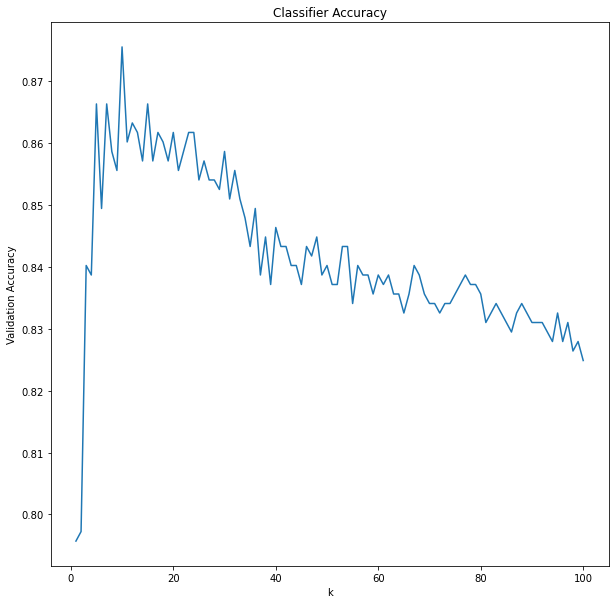

In [395]:
# Classifying by K-Nearest Neighbors : Standard Scaling + Label Encoding
SLK_train_score, SLK_test_score = KNNClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Standard','Label','KNNClassifier', SLK_train_score, SLK_test_score]
knn_score.loc[len(knn_score)]=['Standard','Label','KNNClassifier', SLK_train_score, SLK_test_score]

In [396]:
# Split (Standard Scaling + OneHot Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(st_oneHot_X, st_oneHot_y, test_size=0.2, random_state=1)

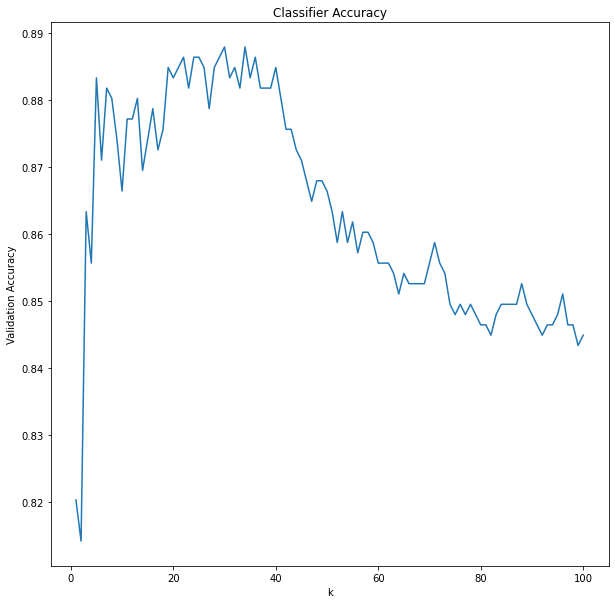

In [397]:
# Classifying by K-Nearest Neighbors : Standard Scaling + OneHot Encoding
SOK_train_score, SOK_test_score = KNNClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Standard','OneHot','KNNClassifier',SOK_train_score,SOK_test_score]
knn_score.loc[len(knn_score)]=['Standard','OneHot','KNNClassifier',SOK_train_score,SOK_test_score]

In [398]:
# Split (MinMax + Label Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(mm_label_X, mm_label_y, test_size=0.2, random_state=1)

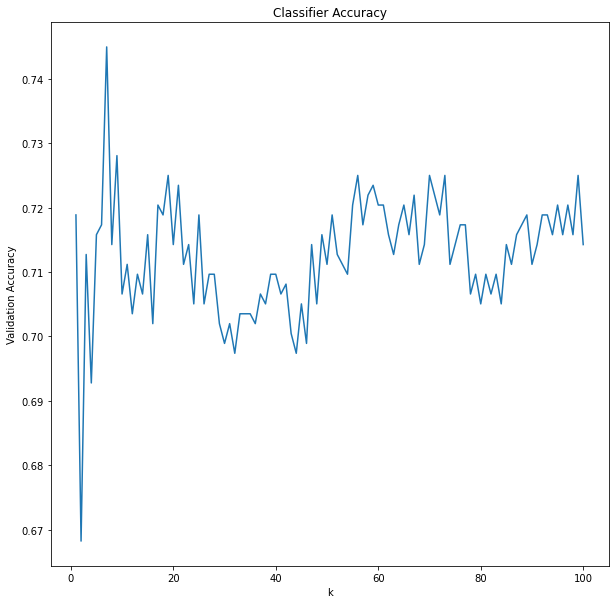

In [399]:
# Classifying by K-Nearest Neighbors : MinMax Scaling + Label Encoding
MLK_train_score, MLK_test_score = KNNClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Min-Max','Label','KNNClassifier',MLK_train_score, MLK_test_score]
knn_score.loc[len(knn_score)]=['Min-Max','Label','KNNClassifier',MLK_train_score, MLK_test_score]

In [400]:
# Split (MinMax + OneHot Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(mm_oneHot_X, mm_oneHot_y, test_size=0.2, random_state=1)

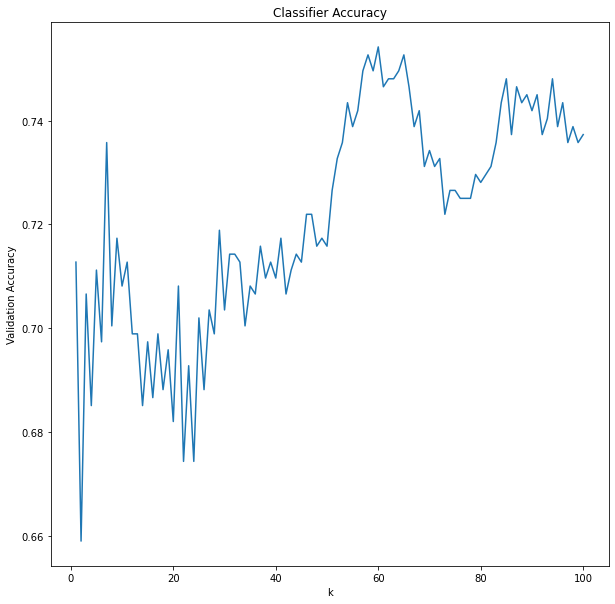

In [401]:
# Classifying by K-Nearest Neighbors : MinMax Scaling + OneHot Encoding
MOK_train_score, MOK_test_score = KNNClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Min-Max','OneHot','KNNClassifier', MOK_train_score, MOK_test_score]
knn_score.loc[len(knn_score)]=['Min-Max','OneHot','KNNClassifier', MOK_train_score, MOK_test_score]

In [402]:
# Split (Robust + Label Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(rb_label_X, rb_label_y, test_size=0.2, random_state=1)

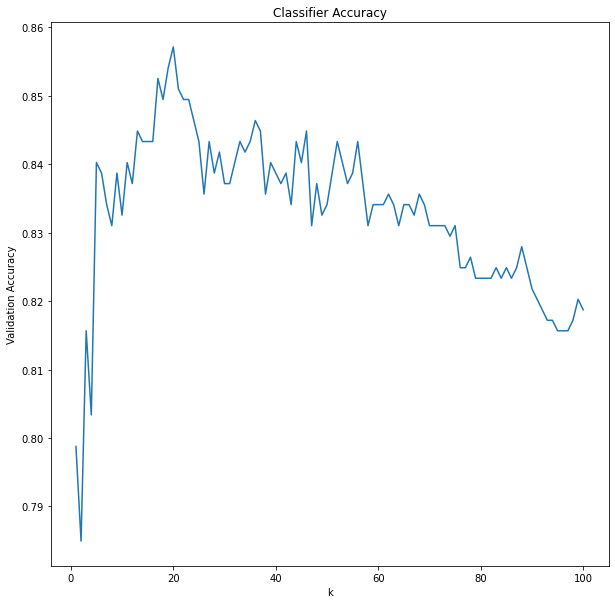

In [403]:
# Classifying by K-Nearest Neighbors : Robust Scaling + Label Encoding
RLK_train_score, RLK_test_score = KNNClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Robust','Label','KNNClassifier',RLK_train_score,RLK_test_score]
knn_score.loc[len(knn_score)]=['Robust','Label','KNNClassifier',RLK_train_score,RLK_test_score]

In [404]:
# Split (Robust + OneHot Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(mm_oneHot_X, mm_oneHot_y, test_size=0.2, random_state=1)

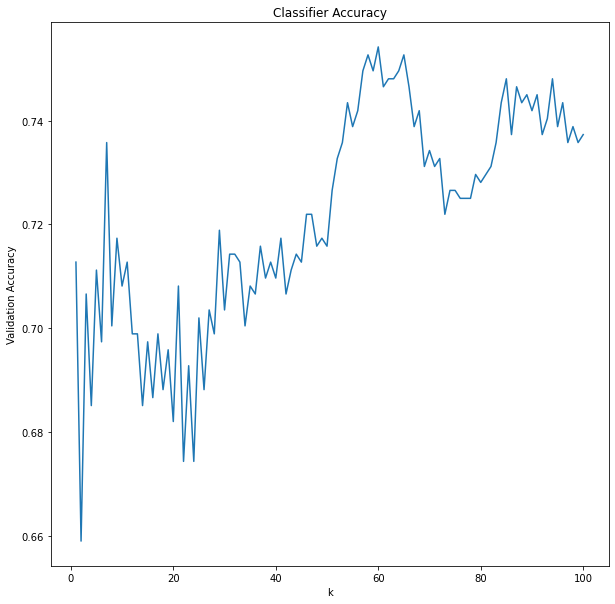

In [405]:
# Classifying by K-Nearest Neighbors : Robust Scaling + OneHot Encoding
ROK_train_score, ROK_test_score = KNNClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Robust','OneHot','KNNClassifier',ROK_train_score, ROK_test_score]
knn_score.loc[len(knn_score)]=['Robust','OneHot','KNNClassifier',ROK_train_score, ROK_test_score]

In [406]:
knn_score.sort_values(by=['Test_score'],ascending=[False])

,Scaler,Encoder,Algorithm,Train_score,Test_score
1,Standard,OneHot,KNNClassifier,0.912025,0.883257
0,Standard,Label,KNNClassifier,0.900884,0.866359
4,Robust,Label,KNNClassifier,0.892432,0.840246
2,Min-Max,Label,KNNClassifier,0.820592,0.715822
3,Min-Max,OneHot,KNNClassifier,0.816366,0.711214
5,Robust,OneHot,KNNClassifier,0.816366,0.711214


**<h2> 2-2) Decision Tree </h2>**

In [407]:
dt_score= pd.DataFrame(columns=['Scaler','Encoder','Algorithm','Train_score','Test_score'])

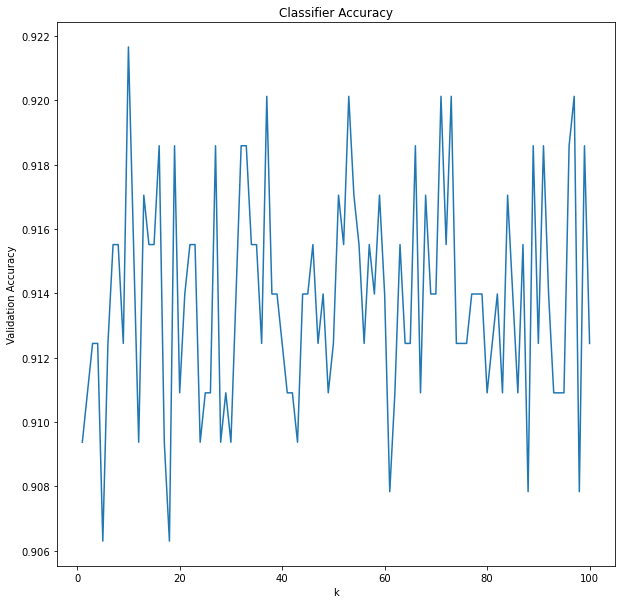

In [408]:
# Split (Standard Scaling + Label Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(st_label_X, st_label_y, test_size=0.2, random_state=1)
# Classifying by DecisionTree : Standard Scaling + Label Encoding
SLD_train_score, SLD_test_score = DTClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Standard','Label','DTClassifier', SLD_train_score, SLD_test_score]
dt_score.loc[len(dt_score)]=['Standard','Label','DTClassifier', SLD_train_score, SLD_test_score]

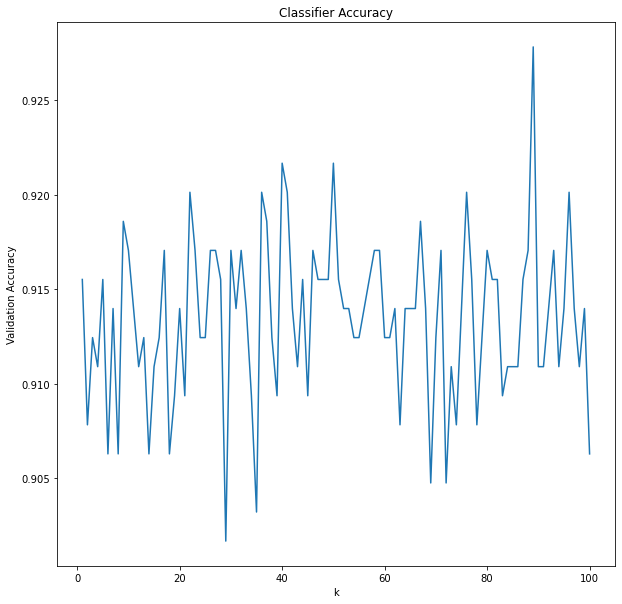

In [409]:
# Split (Standard Scaling + OneHot Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(st_oneHot_X, st_oneHot_y, test_size=0.2, random_state=1)
# Classifying by DecisionTree : Standard Scaling + OneHot Encoding
SOD_train_score, SOD_test_score = DTClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Standard','OneHot','DTClassifier', SOD_train_score, SOD_test_score]
dt_score.loc[len(dt_score)]=['Standard','OneHot','DTClassifier', SOD_train_score, SOD_test_score]

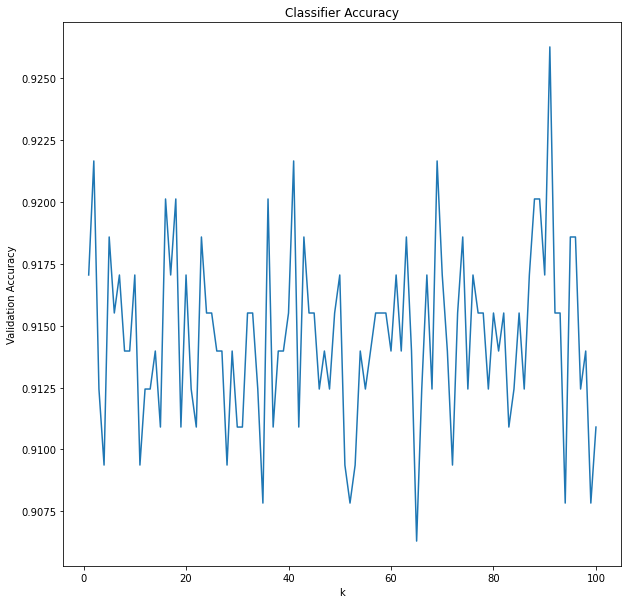

In [410]:
# Split (MinMax + Label Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(mm_label_X, mm_label_y, test_size=0.2, random_state=1)
# Classifying by DecisionTree : MinMax Scaling + Label Encoding
MLD_train_score, MLD_test_score = DTClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Min-Max','Label','DTClassifier', MLD_train_score, MLD_test_score]
dt_score.loc[len(dt_score)]=['Min-Max','Label','DTClassifier', MLD_train_score, MLD_test_score]

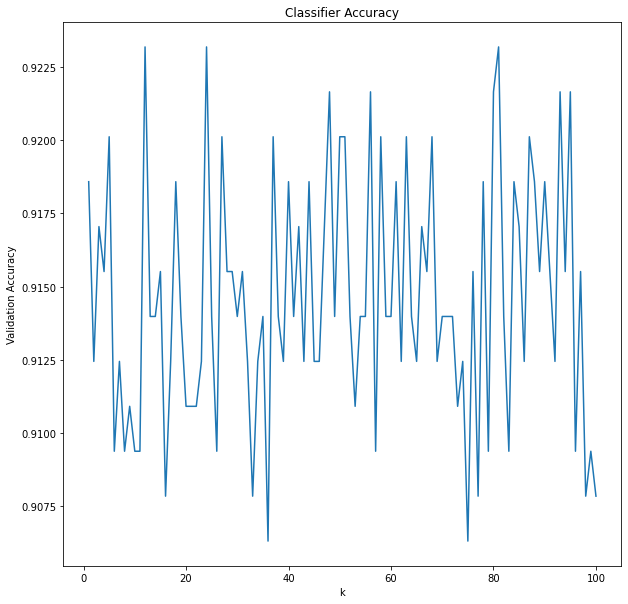

In [411]:
# Split (MinMax + OneHot Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(mm_oneHot_X, mm_oneHot_y, test_size=0.2, random_state=1)
# Classifying by DecisionTree : MinMax Scaling + OneHot Encoding
MOD_train_score, MOD_test_score = DTClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Min-Max','OneHot','DTClassifier', MOD_train_score, MOD_test_score]
dt_score.loc[len(dt_score)]=['Min-Max','OneHot','DTClassifier', MOD_train_score, MOD_test_score]

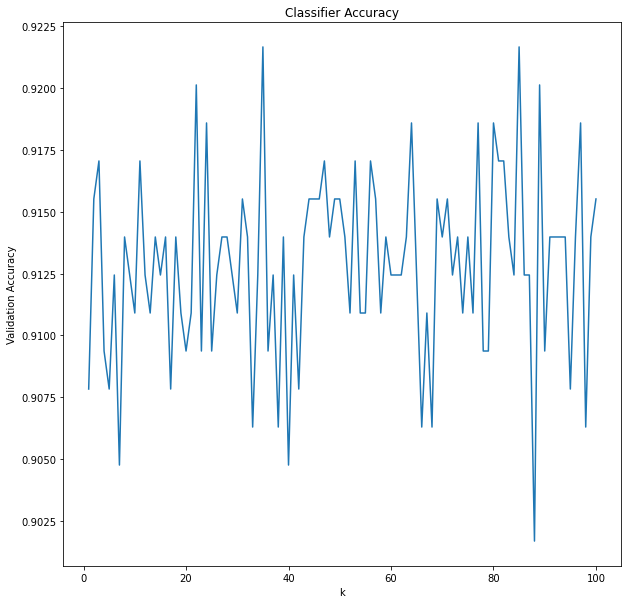

In [412]:
# Split (Robust + Label Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(rb_label_X, rb_label_y, test_size=0.2, random_state=1)
# Classifying by DecisionTree : Robust Scaling + Label Encoding
RLD_train_score, RLD_test_score = DTClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Robust','Label','DTClassifier', RLD_train_score, RLD_test_score]
dt_score.loc[len(dt_score)]=['Robust','Label','DTClassifier', RLD_train_score, RLD_test_score]

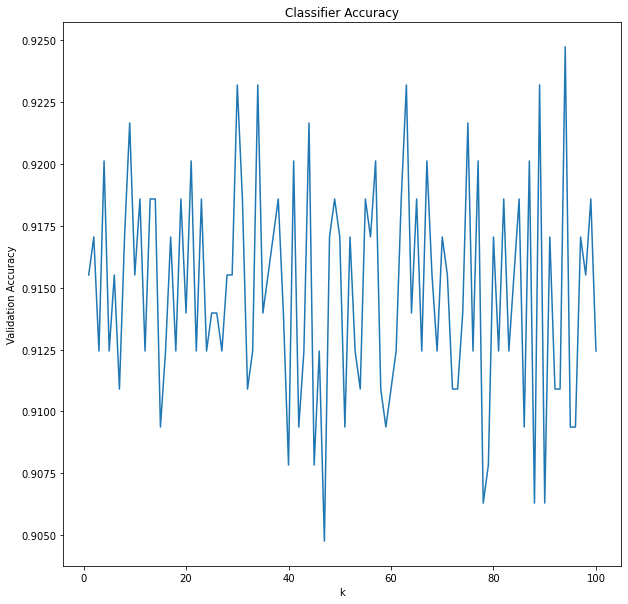

In [413]:
# Split (Robust + OneHot Encoding) dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(mm_oneHot_X, mm_oneHot_y, test_size=0.2, random_state=1)
# Classifying by DecisionTree : Robust Scaling + OneHot Encoding
ROD_train_score, ROD_test_score = DTClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
classification_score.loc[len(classification_score)]=['Robust','OneHot','DTClassifier', ROD_train_score, ROD_test_score]
dt_score.loc[len(dt_score)]=['Robust','OneHot','DTClassifier', ROD_train_score, ROD_test_score]

In [414]:
dt_score.sort_values(by=['Test_score'],ascending=[False])

,Scaler,Encoder,Algorithm,Train_score,Test_score
1,Standard,OneHot,DTClassifier,0.957357,0.921659
3,Min-Max,OneHot,DTClassifier,0.957357,0.920123
5,Robust,OneHot,DTClassifier,0.957357,0.920123
0,Standard,Label,DTClassifier,0.958125,0.918587
4,Robust,Label,DTClassifier,0.958125,0.918587
2,Min-Max,Label,DTClassifier,0.958125,0.917051


In [415]:
classification_score.sort_values(by=['Test_score'],ascending=[False])

,Scaler,Encoder,Algorithm,Train_score,Test_score
7,Standard,OneHot,DTClassifier,0.957357,0.921659
9,Min-Max,OneHot,DTClassifier,0.957357,0.920123
11,Robust,OneHot,DTClassifier,0.957357,0.920123
6,Standard,Label,DTClassifier,0.958125,0.918587
10,Robust,Label,DTClassifier,0.958125,0.918587
8,Min-Max,Label,DTClassifier,0.958125,0.917051
1,Standard,OneHot,KNNClassifier,0.912025,0.883257
0,Standard,Label,KNNClassifier,0.900884,0.866359
4,Robust,Label,KNNClassifier,0.892432,0.840246
2,Min-Max,Label,KNNClassifier,0.820592,0.715822


In [416]:
result = (pd.concat([LogisticRegression_score,classification_score]))
result.sort_values(by=['Test_score'],axis = 0, ascending=[False])

,Scaler,Encoder,Algorithm,Train_score,Test_score
7,Standard,OneHot,DTClassifier,0.957357,0.921659
11,Robust,OneHot,DTClassifier,0.957357,0.920123
9,Min-Max,OneHot,DTClassifier,0.957357,0.920123
10,Robust,Label,DTClassifier,0.958125,0.918587
6,Standard,Label,DTClassifier,0.958125,0.918587
8,Min-Max,Label,DTClassifier,0.958125,0.917051
1,Standard,OneHot,KNNClassifier,0.912025,0.883257
0,Standard,Label,KNNClassifier,0.900884,0.866359
1,Standard,OneHot,LogisticRegression,0.843642,0.861751
0,Standard,Label,LogisticRegression,0.844410,0.857143


# 6. Evaluation

**<h2> k-Fold Cross Validation </h2>**

In [417]:
# (Standard + Label) data
kf_X_sl = Processed_st_label.drop('Attrition_Flag', axis=1)
kf_y_sl = Processed_st_label['Attrition_Flag']

# (Standard + OneHot) data
kf_X_so = Processed_st_oneHot.drop('Attrition_Flag', axis=1)
kf_y_so = Processed_st_oneHot['Attrition_Flag']

# (Min-Max + Label) data
kf_X_ml = Processed_mm_label.drop('Attrition_Flag', axis=1)
kf_y_ml = Processed_mm_label['Attrition_Flag']

# (Min-Max + OneHot) data
kf_X_mo = Processed_mm_oneHot.drop('Attrition_Flag', axis=1)
kf_y_mo = Processed_mm_oneHot['Attrition_Flag']

# (Robust + Label) data
kf_X_rl = Processed_rb_label.drop('Attrition_Flag', axis=1)
kf_y_rl = Processed_rb_label['Attrition_Flag']

# (Robust + OneHot) data
kf_X_ro = Processed_rb_oneHot.drop('Attrition_Flag', axis=1)
kf_y_ro = Processed_rb_oneHot['Attrition_Flag']

**K-Nearest Neighbors Classification using K fold validation**

In [418]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors = 5)
# (Standard + Label) data
cv_scores = cross_val_score(knn_cv, kf_X_sl, kf_y_sl, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('KNN Classifier: K-fold cross validation scores mean for (Standard + Label) : {}'.format(np.mean(cv_scores)))
print()

# (Standard + OneHot) data
cv_scores = cross_val_score(knn_cv, kf_X_so, kf_y_so, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('KNN Classifier: K-fold cross validation scores mean for (Standard + OneHot) : {}'.format(np.mean(cv_scores)))
print()

# (Min-Max + Label) data
cv_scores = cross_val_score(knn_cv, kf_X_ml, kf_y_ml, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('KNN Classifier: K-fold cross validation scores mean for (Min-Max + Label) : {}'.format(np.mean(cv_scores)))
print()

# (Min-Max + OneHot) data
cv_scores = cross_val_score(knn_cv, kf_X_mo, kf_y_mo, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('KNN Classifier: K-fold cross validation scores mean for (Min-Max + OneHot) : {}'.format(np.mean(cv_scores)))
print()

# (Robust + Label) data
cv_scores = cross_val_score(knn_cv, kf_X_rl, kf_y_rl, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('KNN AClassifier K-fold cross validation scores mean for (Robust + Label) : {}'.format(np.mean(cv_scores)))
print()

# (Robust + OneHot) data
cv_scores = cross_val_score(knn_cv, kf_X_ro, kf_y_ro, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('KNN Classifier: K-fold cross validation scores mean for (Robust + OneHot) : {}'.format(np.mean(cv_scores)))

[0.83563748 0.85560676 0.85253456 0.83256528 0.85230769]
KNN Classifier: K-fold cross validation scores mean for (Standard + Label) : 0.8457303556658395

[0.87096774 0.86943164 0.87250384 0.86021505 0.87538462]
KNN Classifier: K-fold cross validation scores mean for (Standard + OneHot) : 0.8697005789909016

[0.69585253 0.74961598 0.72196621 0.68356375 0.70923077]
KNN Classifier: K-fold cross validation scores mean for (Min-Max + Label) : 0.7120458466264917

[0.68356375 0.73579109 0.70967742 0.67895545 0.71076923]
KNN Classifier: K-fold cross validation scores mean for (Min-Max + OneHot) : 0.7037513883965497

[0.83717358 0.86943164 0.82334869 0.82334869 0.83538462]
KNN AClassifier K-fold cross validation scores mean for (Robust + Label) : 0.8377374453503486

[0.85867896 0.86789555 0.85714286 0.83256528 0.85230769]
KNN Classifier: K-fold cross validation scores mean for (Robust + OneHot) : 0.8537180668793573


**Decision Tree Classification using K fold validation**

In [419]:
dt_cv = DecisionTreeClassifier(max_depth=7, random_state=1)
# (Standard + Label) data
cv_scores = cross_val_score(dt_cv, kf_X_sl, kf_y_sl, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('Decision Tree Classifier: K-fold cross validation scores mean for (Standard + Label) : {}'.format(np.mean(cv_scores)))
print()

# (Standard + OneHot) data
cv_scores = cross_val_score(dt_cv, kf_X_so, kf_y_so, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('Decision Tree Classifier: K-fold cross validation scores mean for (Standard + OneHot) : {}'.format(np.mean(cv_scores)))
print()

# (Min-Max + Label) data
cv_scores = cross_val_score(dt_cv, kf_X_ml, kf_y_ml, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('Decision Tree Classifier: K-fold cross validation scores mean for (Min-Max + Label) : {}'.format(np.mean(cv_scores)))
print()

# (Min-Max + OneHot) data
cv_scores = cross_val_score(dt_cv, kf_X_mo, kf_y_mo, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('Decision Tree Classifier: K-fold cross validation scores mean for (Min-Max + OneHot) : {}'.format(np.mean(cv_scores)))
print()

# (Robust + Label) data
cv_scores = cross_val_score(dt_cv, kf_X_rl, kf_y_rl, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('Decision Tree Classifier: K-fold cross validation scores mean for (Robust + Label) : {}'.format(np.mean(cv_scores)))
print()

# (Robust + OneHot) data
cv_scores = cross_val_score(dt_cv, kf_X_ro, kf_y_ro, cv = 5)
print(cv_scores)
# Accuracy of Predicted Values
print('Decision Tree Classifier: K-fold cross validation scores mean for (Robust + OneHot) : {}'.format(np.mean(cv_scores)))

[0.90322581 0.91551459 0.88940092 0.9078341  0.90307692]
Decision Tree Classifier: K-fold cross validation scores mean for (Standard + Label) : 0.9038104691007917

[0.89861751 0.91551459 0.89247312 0.9078341  0.89846154]
Decision Tree Classifier: K-fold cross validation scores mean for (Standard + OneHot) : 0.9025801725156564

[0.90322581 0.91551459 0.88940092 0.9078341  0.90307692]
Decision Tree Classifier: K-fold cross validation scores mean for (Min-Max + Label) : 0.9038104691007917

[0.89861751 0.91551459 0.89247312 0.9078341  0.89846154]
Decision Tree Classifier: K-fold cross validation scores mean for (Min-Max + OneHot) : 0.9025801725156564

[0.90322581 0.91551459 0.88786482 0.9078341  0.90307692]
Decision Tree Classifier: K-fold cross validation scores mean for (Robust + Label) : 0.9035032494387332

[0.89861751 0.91551459 0.89247312 0.9078341  0.89846154]
Decision Tree Classifier: K-fold cross validation scores mean for (Robust + OneHot) : 0.9025801725156564


**<h2> Ensemble </h2>**

In [420]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [421]:
# For efficiency, we will increase the n_estimator by looking at the stump as the data grows
classifier = RandomForestClassifier(max_depth = 2)

In [422]:
grid_param = {'n_estimators':[100,300,500,800,1000], 'criterion':['gini','entropy'], 'bootstrap':[True,False]}

gd_sr = GridSearchCV(estimator = classifier, param_grid = grid_param, scoring='accuracy', cv=5, n_jobs=-1)

gd_sr.fit(kf_X_sl, kf_y_sl)
best_parameters = gd_sr.best_params_
print('Best parameters for (Standard + Label) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Standard + Label) : ', best_result)
print()

gd_sr.fit(kf_X_so, kf_y_so)
best_parameters = gd_sr.best_params_
print('Best parameters for (Standard + OneHot) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Standard + OneHot) : ', best_result)
print()

gd_sr.fit(kf_X_ml, kf_y_ml)
best_parameters = gd_sr.best_params_
print('Best parameters for (Min-Max + Label) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Min-Max + Label) : ', best_result)
print()

gd_sr.fit(kf_X_mo, kf_y_mo)
best_parameters = gd_sr.best_params_
print('Best parameters for (Min-Max + OneHot) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Min-Max + OneHot) : ', best_result)
print()

gd_sr.fit(kf_X_rl, kf_y_rl)
best_parameters = gd_sr.best_params_
print('Best parameters for (Robust + Label) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Robust + Label) : ', best_result)
print()

gd_sr.fit(kf_X_ro, kf_y_ro)
best_parameters = gd_sr.best_params_
print('Best parameters for (Robust + OneHot) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Robust + OneHot) : ', best_result)
print()

Best parameters for (Standard + Label) :  {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 500}
Best Result for (Standard + Label) :  0.8220630981921303

Best parameters for (Standard + OneHot) :  {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 100}
Best Result for (Standard + OneHot) :  0.8331206427980622

Best parameters for (Min-Max + Label) :  {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}
Best Result for (Min-Max + Label) :  0.8214514947418173

Best parameters for (Min-Max + OneHot) :  {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}
Best Result for (Min-Max + OneHot) :  0.83005222734255

Best parameters for (Robust + Label) :  {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 800}
Best Result for (Robust + Label) :  0.8235996691480564

Best parameters for (Robust + OneHot) :  {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 100}
Best Result for (Robust + OneHot) :  0.8294368427271653



In [423]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)

In [424]:
grid_param = {'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']}

gd_sr = GridSearchCV(estimator = classifier, param_grid = grid_param, scoring='accuracy', cv=5, n_jobs=-1)

gd_sr.fit(kf_X_sl, kf_y_sl)
best_parameters = gd_sr.best_params_
print('Best parameters for (Standard + Label) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Standard + Label) : ', best_result)
print()

gd_sr.fit(kf_X_so, kf_y_so)
best_parameters = gd_sr.best_params_
print('Best parameters for (Standard + OneHot) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Standard + OneHot) : ', best_result)
print()

gd_sr.fit(kf_X_ml, kf_y_ml)
best_parameters = gd_sr.best_params_
print('Best parameters for (Min-Max + Label) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Min-Max + Label) : ', best_result)
print()

gd_sr.fit(kf_X_mo, kf_y_mo)
best_parameters = gd_sr.best_params_
print('Best parameters for (Min-Max + OneHot) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Min-Max + OneHot) : ', best_result)
print()

gd_sr.fit(kf_X_rl, kf_y_rl)
best_parameters = gd_sr.best_params_
print('Best parameters for (Robust + Label) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Robust + Label) : ', best_result)
print()

gd_sr.fit(kf_X_ro, kf_y_ro)
best_parameters = gd_sr.best_params_
print('Best parameters for (Robust + OneHot) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Robust + OneHot) : ', best_result)
print()

Best parameters for (Standard + Label) :  {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Best Result for (Standard + Label) :  0.8795358619874749

Best parameters for (Standard + OneHot) :  {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Best Result for (Standard + OneHot) :  0.8773872149356021

Best parameters for (Min-Max + Label) :  {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'distance'}
Best Result for (Min-Max + Label) :  0.786419945645752

Best parameters for (Min-Max + OneHot) :  {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
Best Result for (Min-Max + OneHot) :  0.7685960061443933

Best parameters for (Robust + Label) :  {'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'distance'}
Best Result for (Robust + Label) :  0.8773848517074324

Best parameters for (Robust + OneHot) :  {'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'distance'}
Best Result for (Robust + OneHot) :  0.8761531371853952



In [425]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [426]:
grid_param = {'criterion':['gini','entropy'], 'max_depth':[None,2,3,4,5,6], 'max_leaf_nodes':[None,2,3,4,5,6,7]}

gd_sr = GridSearchCV(estimator = classifier, param_grid = grid_param, scoring='accuracy', cv=5, n_jobs=-1)

gd_sr.fit(kf_X_sl, kf_y_sl)
best_parameters = gd_sr.best_params_
print('Best parameters for (Standard + Label) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Standard + Label) : ', best_result)
print()

gd_sr.fit(kf_X_so, kf_y_so)
best_parameters = gd_sr.best_params_
print('Best parameters for (Standard + OneHot) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Standard + OneHot) : ', best_result)
print()

gd_sr.fit(kf_X_ml, kf_y_ml)
best_parameters = gd_sr.best_params_
print('Best parameters for (Min-Max + Label) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Min-Max + Label) : ', best_result)
print()

gd_sr.fit(kf_X_mo, kf_y_mo)
best_parameters = gd_sr.best_params_
print('Best parameters for (Min-Max + OneHot) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Min-Max + OneHot) : ', best_result)
print()

gd_sr.fit(kf_X_rl, kf_y_rl)
best_parameters = gd_sr.best_params_
print('Best parameters for (Robust + Label) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Robust + Label) : ', best_result)
print()

gd_sr.fit(kf_X_ro, kf_y_ro)
best_parameters = gd_sr.best_params_
print('Best parameters for (Robust + OneHot) : ', best_parameters)
best_result = gd_sr.best_score_
print('Best Result for (Robust + OneHot) : ', best_result)
print()

Best parameters for (Standard + Label) :  {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None}
Best Result for (Standard + Label) :  0.9059652605459056

Best parameters for (Standard + OneHot) :  {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None}
Best Result for (Standard + OneHot) :  0.9056585135294812

Best parameters for (Min-Max + Label) :  {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None}
Best Result for (Min-Max + Label) :  0.9081167434715821

Best parameters for (Min-Max + OneHot) :  {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None}
Best Result for (Min-Max + OneHot) :  0.905659458820749

Best parameters for (Robust + Label) :  {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None}
Best Result for (Robust + Label) :  0.9050450194966324

Best parameters for (Robust + OneHot) :  {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None}
Best Result for (Robust + OneHot) :  0.9035103391232424


# 7. Conclusion

We use 3 scaling method : Standard, Min-Max, Robust
We use 3 modeling method : Logistic Regression, KNN Classifier, Decision Tree Classifier
The best accuracy combination: Robust scaling + OneHot Encoding + Decision Tree Classifier
The average score for k fold validation of this combination is as follows : 0.90196
When using ensemble techniques, the optimal parameters are as follows:
'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None

gitHub: https://github.com/SevngIl/datascience_termProject.git

# Reference:
https://leaps.analyttica.com/home
https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers
https://www.kaggle.com/code/dabawse/customer-churn-classification
